In [210]:
import pandas as pd
import numpy as np
from pprint import pprint
data_file_path = ""
csv_file_name = "Austin Bicycle Crashes 2010-2017 revised.csv"
dataset = pd.read_csv(data_file_path+csv_file_name)
dataset.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Adjusted Average Daily Traffic Amount,Agency,At Intersection Flag,Average Daily Traffic Amount,Average Daily Traffic Year,Case ID,Construction Zone Flag,...,Roadway Part,Roadway Relation,Roadway Type,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,11243623,False,False,15262.0,Austin Police Department,False,15262.0,2014.0,100010723,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
2,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
3,12112069,False,False,NaN,Austin Police Department,False,NaN,NaN,100010834,False,...,Main/Proper Lane,On Roadway,NaN,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn
4,11376123,False,False,22775.0,Austin Police Department,False,22775.0,2014.0,100042009,False,...,Main/Proper Lane,On Roadway,"4 Or More Lanes, Undivided",45,SL0111,1487,Dry,None,Clear,Not Worn


<AxesSubplot:>

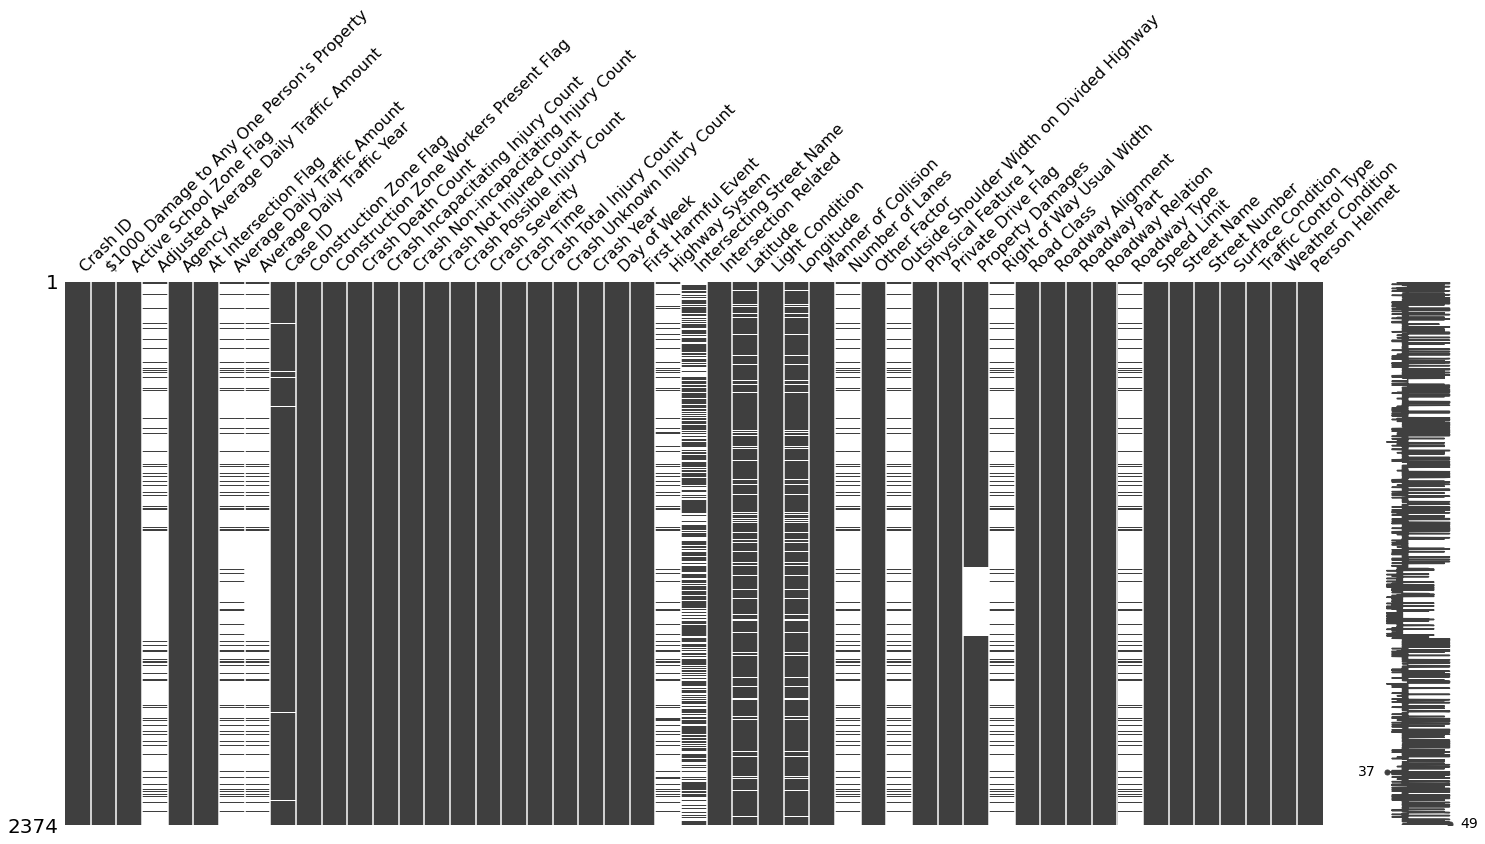

In [211]:
dataset.drop_duplicates('Crash ID', inplace=True) # assuming Crash ID is the primary key
# Visualising missing value
import missingno as msno
msno.matrix(dataset)

<AxesSubplot:>

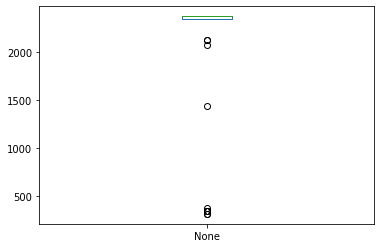

In [212]:
# another visualization of missing values based on counting
dataset.count().plot.box()

In [213]:
# from previous boxplot, we decide drop the columns whose counts less then 2000
li = filter(lambda col_nm: dataset[col_nm].count() < 2000, dataset)
li = list(li)
li # the list of columns will be drop

['Adjusted Average Daily Traffic Amount',
 'Average Daily Traffic Amount',
 'Average Daily Traffic Year',
 'Highway System',
 'Intersecting Street Name',
 'Number of Lanes',
 'Outside Shoulder Width on Divided Highway',
 'Right of Way Usual Width',
 'Roadway Type']

In [214]:
dataset.drop(li, axis=1, inplace=True)

In [215]:
dataset.count(1)[0] # number of variables

40

<AxesSubplot:>

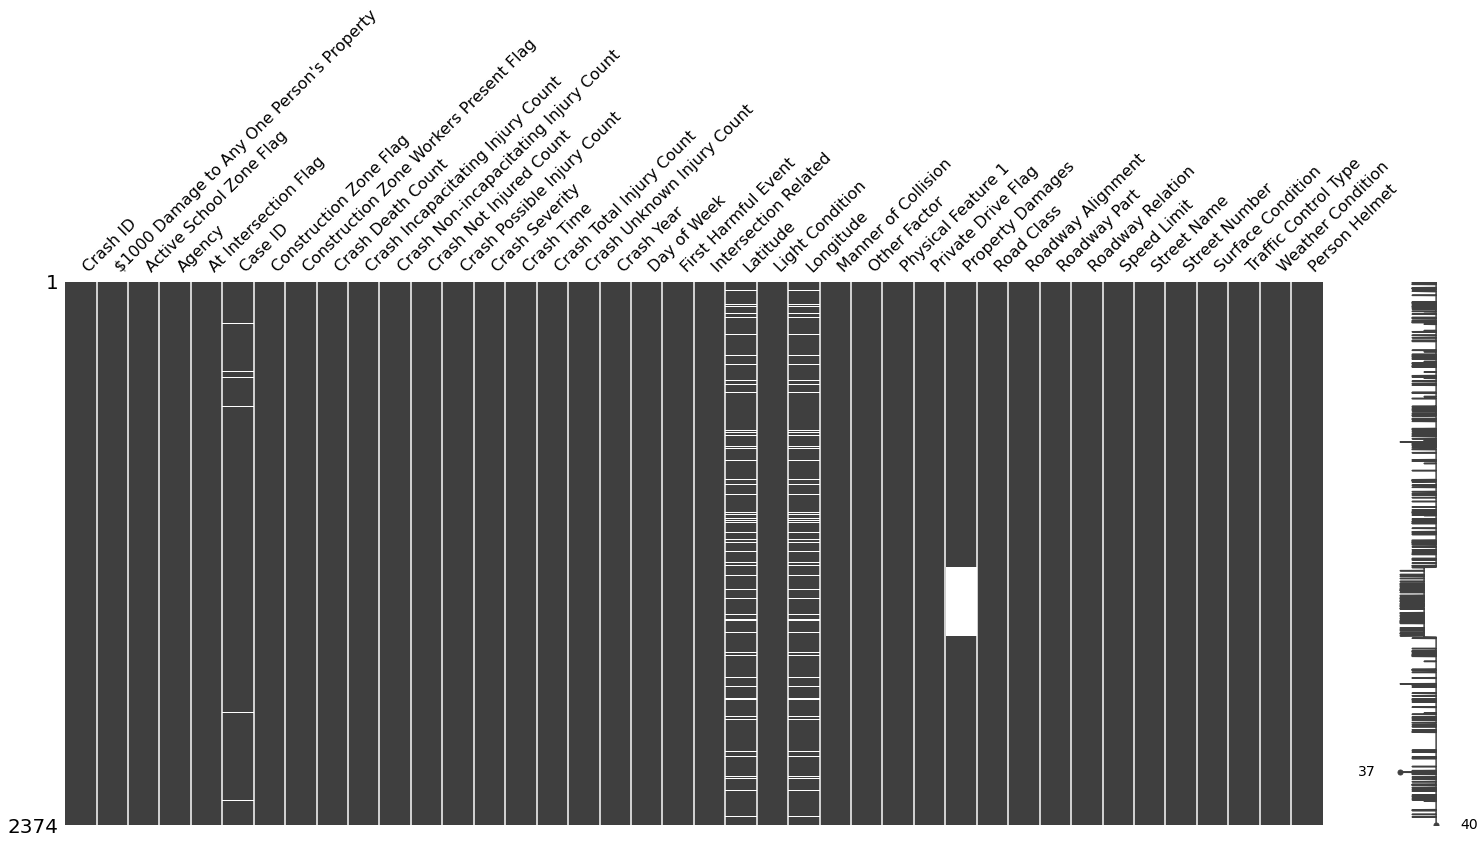

In [216]:
import missingno as msno
msno.matrix(dataset)

# Dropping Row

<AxesSubplot:>

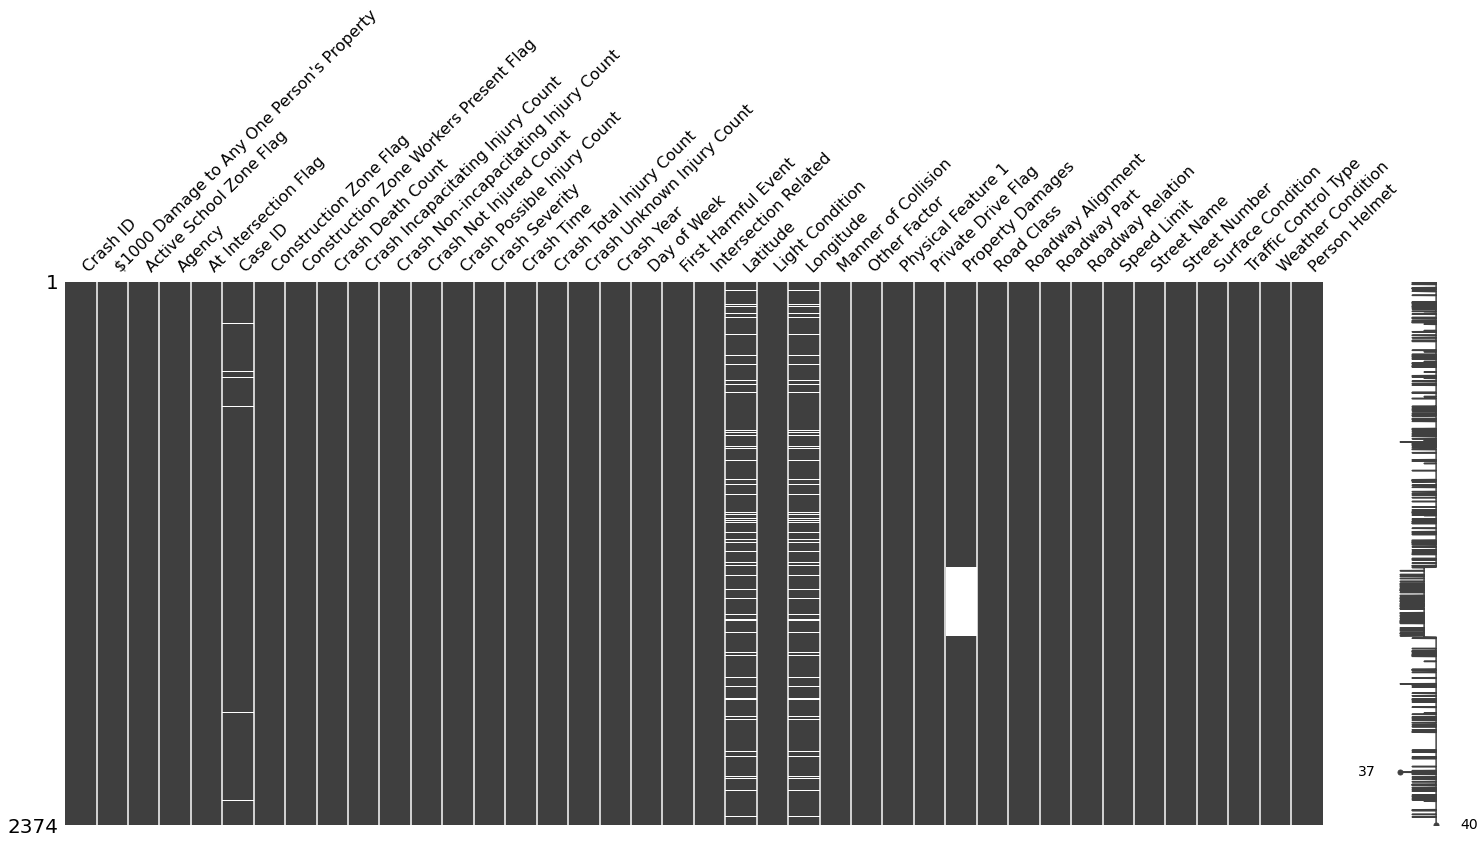

In [217]:
msno.matrix(dataset)

<AxesSubplot:>

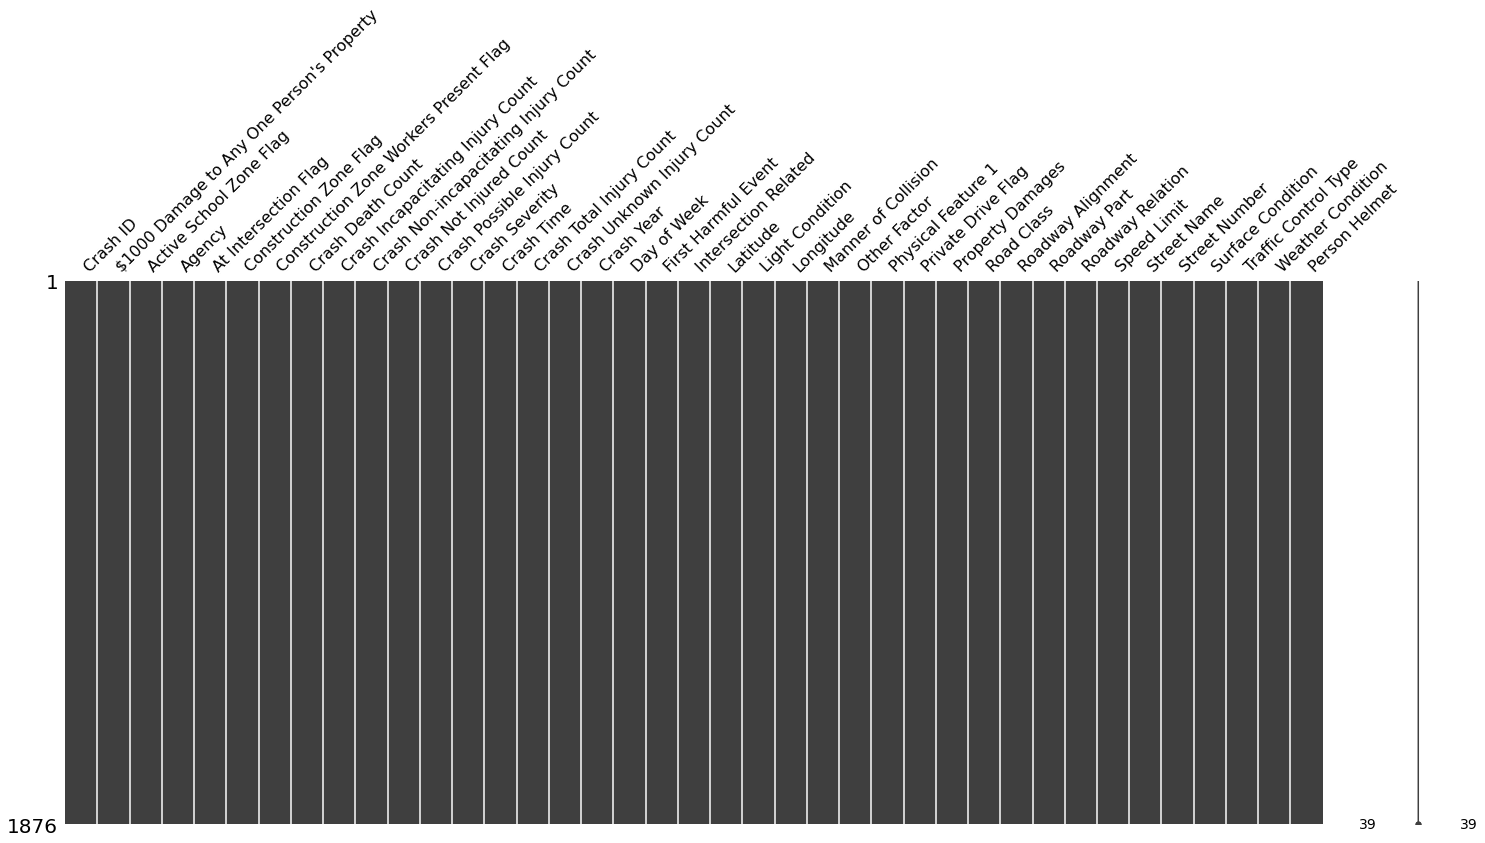

In [218]:
# we may assume that Crash ID is the primary key
# hence drop Case ID
dataset.drop("Case ID", axis=1, inplace = True) 
dataset = dataset.dropna()
msno.matrix(dataset)

We have reach at the point where there is no obvious missing data, thus the data is cleaner than initially.

In [219]:
from pyproj import Proj, transform
# cartography(map making field), all maps are projected
# then we use Mercator projection here
lons, lats = [], []
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
for lon, lat in list(zip(dataset["Longitude"], dataset["Latitude"])):
    x, y = transform(outProj,inProj,lon,lat)
    lons.append(x)
    lats.append(y)
dataset["MercatorX"] = lons
dataset["MercatorY"] = lats

c:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\Leong Teng Man\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LEONGT~1\AppData\Local\Temp/ipykernel_19788/1622515699.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.gi

# Dropping Columns 2

In [220]:
dataset.drop('Crash Severity', axis=1, inplace = True)

In [221]:
def save_df_csv(csv_str, file_name, path=""):
	f = open(path+file_name, "w")
	f.write(csv_str)
	f.close()
extract_file_name = lambda f: f.split(".")[0]
save_df_csv(dataset.to_csv(index=False, line_terminator="\n"),
file_name=f"{extract_file_name(csv_file_name)} subset.csv")